In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

# Correct file path
SS_RFM = '/Users/zabuza/Documents/B/Python/K-means cluster/Superstore/1. RXP2.csv'

# Load the dataset
data = pd.read_csv(SS_RFM)

# Display the first few rows of the data
print(data.head())

  Customer ID  Customer Name Unnamed: 2 Unnamed: 3 Unnamed: 4  Recency  \
0    DP-13000  Darren Powers      Paper    8/26/24     1/7/25     -134   
1    PO-19195  Phillina Ober    Binders    10/5/24     1/7/25      -94   
2    MB-18085     Mick Brown        Art   11/16/24     1/7/25      -52   
3    ME-17320  Maria Etezadi     Chairs   11/18/24     1/7/25      -50   
4    JO-15145  Jack O'Briant        Art    11/3/24     1/7/25      -65   

   Frequeny       CLV Profit_nbr  Profit_pct   IPO     AOV      CLV2  \
0        17   1050.64     241.45        23.0  3.41   61.80   1089.46   
1        10   1056.86     -49.70        -4.7  3.20  105.69   1145.35   
2        10   1428.23     117.81         8.2  3.90  142.82   1493.52   
3        22  10663.73   1,859.47        17.4  3.73  484.71  11627.58   
4        13   3254.95     581.40        17.9  4.54  250.38   3784.28   

   Profit_nbr2  Profit_pct2  IPO2    AOV2  
0       280.28        25.73  3.41   64.09  
1        38.79         3.39  3.20 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    804 non-null    object 
 1   Customer Name  804 non-null    object 
 2   Unnamed: 2     804 non-null    object 
 3   Unnamed: 3     804 non-null    object 
 4   Unnamed: 4     804 non-null    object 
 5   Recency        804 non-null    int64  
 6   Frequeny       804 non-null    int64  
 7   CLV            804 non-null    float64
 8   Profit_nbr     804 non-null    object 
 9   Profit_pct     804 non-null    float64
 10  IPO            804 non-null    float64
 11  AOV            804 non-null    float64
 12  CLV2           804 non-null    float64
 13  Profit_nbr2    804 non-null    float64
 14  Profit_pct2    804 non-null    float64
 15  IPO2           804 non-null    float64
 16  AOV2           804 non-null    float64
dtypes: float64(9), int64(2), object(6)
memory usage: 106.9

In [5]:
# Rename 'Frequeny' to 'Frequency'
data.rename(columns={'Frequeny': 'Frequency'}, inplace=True)

# Verify change
print(data.columns)

Index(['Customer ID', 'Customer Name', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Recency', 'Frequency', 'CLV', 'Profit_nbr', 'Profit_pct',
       'IPO', 'AOV', 'CLV2', 'Profit_nbr2', 'Profit_pct2', 'IPO2', 'AOV2'],
      dtype='object')


In [7]:
data.describe(include = 'all').round(2)

,Customer ID,Customer Name,Unnamed: 2,Unnamed: 3,Unnamed: 4,Recency,Frequency,CLV,Profit_nbr,Profit_pct,IPO,AOV,CLV2,Profit_nbr2,Profit_pct2,IPO2,AOV2
count,804,804,804,804,804,804.00,804.00,804.00,804,804.00,804.00,804.00,804.00,804.00,804.00,804.00,804.00
unique,804,800,17,300,1,NaN,NaN,NaN,802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,DP-13000,Harry Olson,Binders,12/2/24,1/7/25,NaN,NaN,NaN,117.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,5,129,16,804,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,-154.16,12.68,2893.70,NaN,10.98,3.79,225.24,3156.49,626.35,17.64,3.79,245.54
std,NaN,NaN,NaN,NaN,NaN,185.83,6.57,2653.78,NaN,20.02,0.75,189.53,2949.34,1033.58,17.43,0.75,211.60
min,NaN,NaN,NaN,NaN,NaN,-1173.00,1.00,4.83,NaN,-136.70,1.00,2.42,5.30,-5555.87,-97.22,1.00,2.90
25%,NaN,NaN,NaN,NaN,NaN,-188.75,8.00,1084.54,NaN,4.20,3.32,113.16,1198.39,125.46,10.08,3.32,122.19
50%,NaN,NaN,NaN,NaN,NaN,-83.00,12.00,2243.39,NaN,14.50,3.75,180.90,2436.31,366.90,20.74,3.75,194.16
75%,NaN,NaN,NaN,NaN,NaN,-37.00,16.00,3790.81,NaN,22.82,4.22,281.01,4069.51,827.57,27.76,4.22,305.16


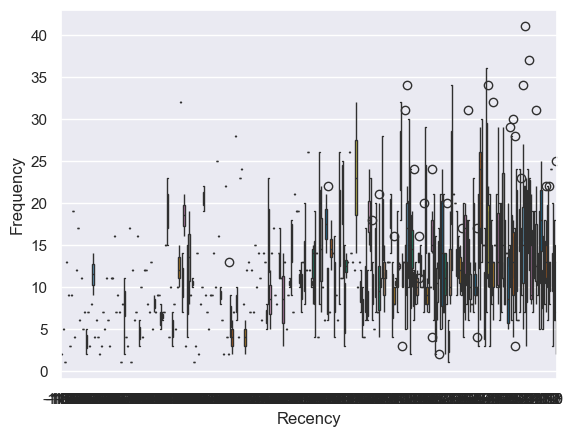

In [9]:
sns.set_theme()

ax = sns.boxplot(data = data,
                 x='Recency',
                 y='Frequency',
                 hue='Recency',
                 palette='colorblind',
                 legend=False)
              

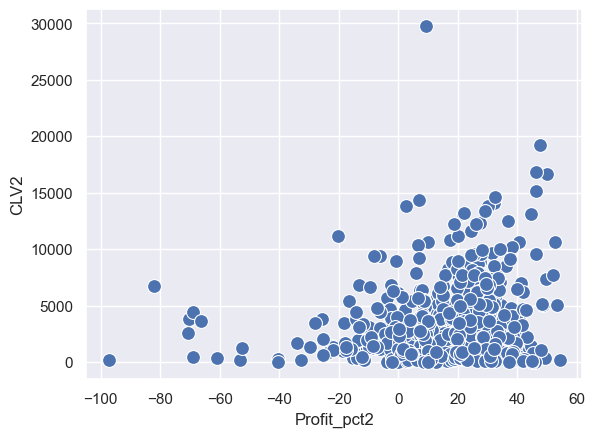

In [11]:
ax = sns.scatterplot(data = data,
                     x = 'Profit_pct2',
                     y = 'CLV2',
                     s = 100)

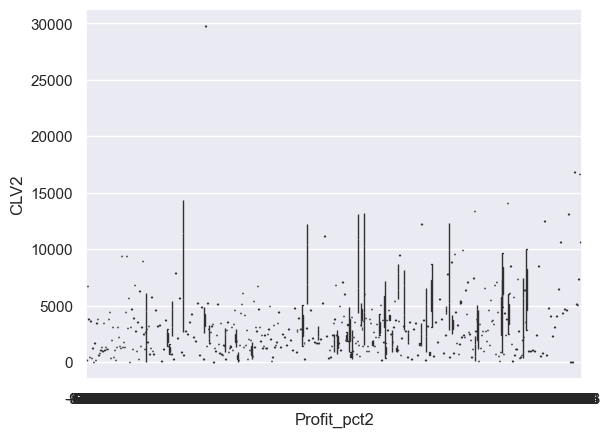

In [13]:
ax = sns.boxplot(data=data,
                 x='Profit_pct2',
                 y='CLV2',
                 hue='Profit_pct2',
                 palette='colorblind',
                 legend=False)


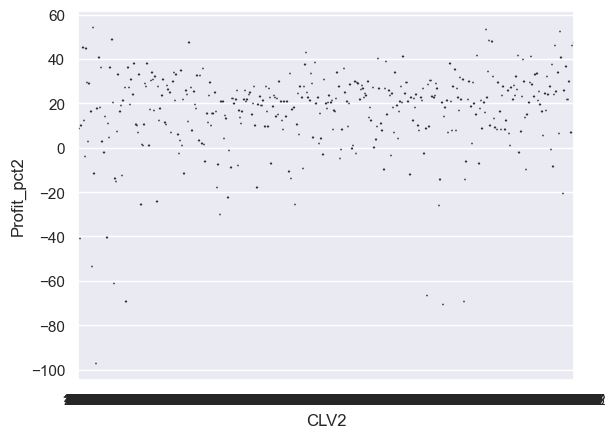

In [15]:
ax = sns.boxplot(data=data,
                 x='CLV2',
                 y='Profit_pct2',
                 hue='CLV2',
                 palette='colorblind',
                 legend=False)


In [17]:
scaler = StandardScaler()

In [19]:
data_scaledCLV_P = scaler.fit_transform(data[['CLV2','Profit_pct2']])

In [21]:
data_scaledCLV_P = pd.DataFrame(data_scaledCLV_P, columns = ['CLV2','Profit_pct2'])

In [23]:
data_scaledCLV_P.describe().round(2)

,CLV2,Profit_pct2
count,804.00,804.00
mean,0.00,0.00
std,1.00,1.00
min,-1.07,-6.60
25%,-0.66,-0.43
50%,-0.24,0.18
75%,0.31,0.58
max,9.02,2.10


In [25]:
km = KMeans(n_clusters = 3, n_init = 25, random_state = 1234)

In [27]:
km.fit(data_scaledCLV_P)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [29]:
km.inertia_

711.2601747605627

In [31]:
km.labels_

array([1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 0,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2,
       0, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1,

In [33]:
pd.Series(km.labels_).value_counts().sort_index()

0     99
1    571
2    134
Name: count, dtype: int64

In [35]:
km.cluster_centers_

array([[ 2.05486042,  0.45689625],
       [-0.27628875,  0.29890545],
       [-0.34082318, -1.61125179]])

In [37]:
cluster_centers = pd.DataFrame(km.cluster_centers_,
                               columns = ['CLV2','Profit_pct2'])
cluster_centers

,CLV2,Profit_pct2
0,2.054860,0.456896
1,-0.276289,0.298905
2,-0.340823,-1.611252


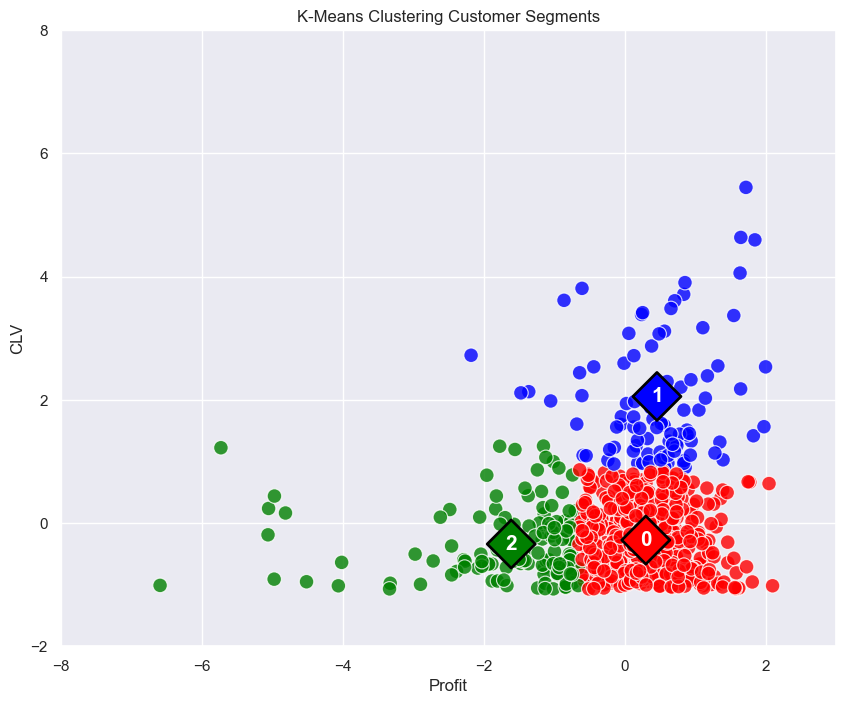

In [39]:
# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaledCLV_P[['Profit_pct2', 'CLV2']])  # Replace column names if needed

# Add cluster labels to the data
data_scaledCLV_P['Cluster'] = kmeans.labels_

# Define custom cluster colors
custom_palette = {0: 'red', 1: 'blue', 2: 'green'}

# Create a DataFrame for centroids
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Profit_pct2', 'CLV2'])
cluster_centers['Cluster'] = [0, 1, 2]  # Match the cluster indices to the colors

# Set consistent axis limits
x_limits = (-8, 3)  # Replace with desired x-axis limits
y_limits = (-2, 8)  # Replace with desired y-axis limits

# Plot the Clusters
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(data=data_scaledCLV_P,
                     x='Profit_pct2',
                     y='CLV2',
                     hue='Cluster',
                     palette=custom_palette,
                     alpha=0.8,
                     s=110,
                     legend=False)

# Plot the Centroids
ax = sns.scatterplot(data=cluster_centers,
                     x='Profit_pct2',
                     y='CLV2',
                     hue='Cluster',
                     palette=custom_palette,
                     s=600,
                     marker='D',
                     ec='black',
                     legend=False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
    plt.text(x=cluster_centers.Profit_pct2[i],
             y=cluster_centers.CLV2[i],
             s=cluster_centers.Cluster[i],
             horizontalalignment='center',
             verticalalignment='center',
             size=15,
             weight='bold',
             color='white')

# Set consistent axis limits
plt.xlim(x_limits)
plt.ylim(y_limits)

# Finalize the Plot
plt.title("K-Means Clustering Customer Segments")
plt.xlabel("Profit")
plt.ylabel("CLV")
plt.show()

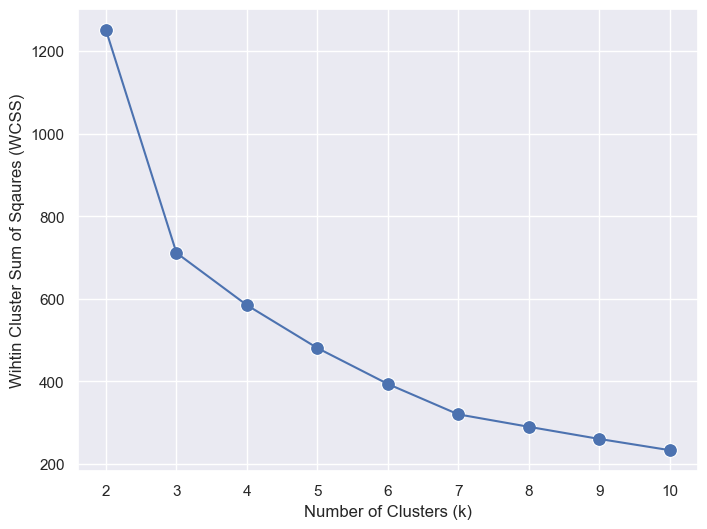

In [43]:
# Within Cluster Sum of Squares (WCSS)
wcss = []
for k in range(2,11):
        km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
        km.fit(data_scaledCLV_P)
        wcss.append(km.inertia_)

wcss_series = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 100)
ax = ax.set(xlabel = 'Number of Clusters (k)',
            ylabel = 'Wihtin Cluster Sum of Sqaures (WCSS)')

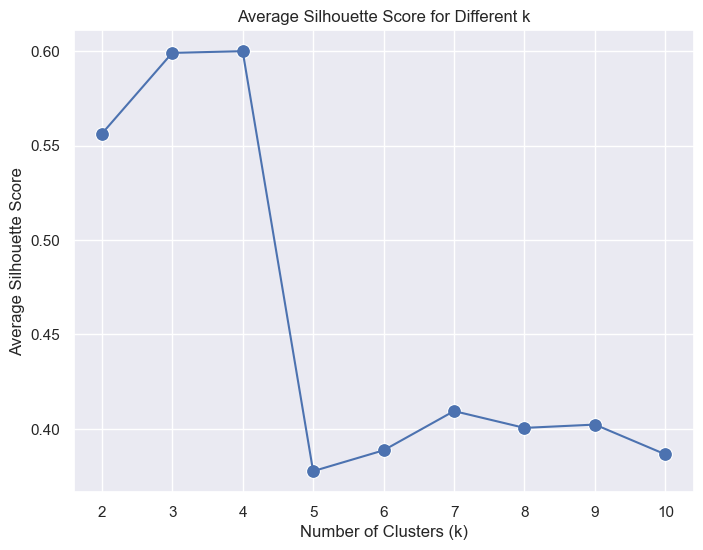

In [45]:
# Average Silhouette Score
silhouette = []
for k in range(2, 11):  # Silhouette score requires at least 2 clusters
    km = KMeans(n_clusters = k, n_init=25, random_state=1234)
    km.fit(data_scaledCLV_P)
    silhouette.append(silhouette_score(data_scaledCLV_P, km.labels_))

# Convert silhouette scores to a pandas Series for plotting
silhouette_series = pd.Series(silhouette, index=range(2, 11))

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
ax = sns.lineplot(y=silhouette_series, x=silhouette_series.index)
ax = sns.scatterplot(y=silhouette_series, x=silhouette_series.index, s=100)
ax.set(xlabel='Number of Clusters (k)',
       ylabel='Average Silhouette Score',
       title='Average Silhouette Score for Different k')
plt.show()

In [47]:
km = KMeans(n_clusters = 3, n_init = 25, random_state = 1234)

In [49]:
km.fit(data_scaledCLV_P)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [51]:
data_scaledCLV_P['Clusters'] = km.labels_
data_scaledCLV_P.head(25)

,CLV2,Profit_pct2,Cluster,Clusters
0,-0.701282,0.464245,0,1
1,-0.682320,-0.818510,2,2
2,-0.564196,-0.309198,0,1
3,2.873983,0.380986,1,0
4,0.212989,0.672104,0,1
5,-0.931004,0.138101,0,1
6,-0.656807,-1.475390,2,2
7,-0.928300,-0.065164,0,1
8,0.695186,-0.473992,0,1
9,3.384927,0.238011,1,0


In [53]:
print(km.n_clusters)

3


In [55]:
data['Clusters'] = data_scaledCLV_P['Clusters']

print(data.head(25))
print(data['Clusters'].unique())

   Customer ID       Customer Name   Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0     DP-13000       Darren Powers        Paper    8/26/24     1/7/25   
1     PO-19195       Phillina Ober      Binders    10/5/24     1/7/25   
2     MB-18085          Mick Brown          Art   11/16/24     1/7/25   
3     ME-17320       Maria Etezadi       Chairs   11/18/24     1/7/25   
4     JO-15145       Jack O'Briant          Art    11/3/24     1/7/25   
5     LS-17230    Lycoris Saunders        Paper   11/14/22     1/7/25   
6     VS-21820    Vivek Sundaresam  Furnishings    5/23/24     1/7/25   
7     MS-17830       Melanie Seite          Art    10/4/23     1/7/25   
8     AJ-10780      Anthony Jacobs  Furnishings   10/16/24     1/7/25   
9     SV-20365         Seth Vernon  Furnishings    9/20/24     1/7/25   
10    BD-11605        Brian Dahlen    Bookcases    9/24/24     1/7/25   
11    ND-18370   Natalie DeCherney       Chairs    12/3/24     1/7/25   
12    MM-17920       Michael Moore      Binders   1

In [57]:
total_clv2_cluster_2 = data[data["Clusters"] == 2]["CLV2"].sum()

print(f"Total CLV2 where Clusters = 2:{total_clv2_cluster_2}")

Total CLV2 where Clusters = 2:288356.44999999995


In [59]:
total_Profit_nbr2_cluster_2 = data[data["Clusters"] == 2]["Profit_nbr2"].sum()

print(f"Total Profit where Clusters = 2:{total_Profit_nbr2_cluster_2}")

Total Profit where Clusters = 2:-30356.010000000002


In [61]:
# Group by 'Clusters' and sum the 'CLV2' column for each cluster
clv2_sums_by_cluster = data.groupby("Clusters")["CLV2"].sum()

# Iterate through the results and print the sum for each cluster
for cluster, total_clv2 in clv2_sums_by_cluster.items():
    print(f"Total CLV2 where Clusters = {cluster}: {total_clv2}")


Total CLV2 where Clusters = 0: 912107.73
Total CLV2 where Clusters = 1: 1337355.96
Total CLV2 where Clusters = 2: 288356.45


In [63]:
# Group by 'Clusters' and sum the 'Profit_nbr2' column for each cluster
profit_nbr2_sums_by_cluster = data.groupby("Clusters")["Profit_nbr2"].sum()

# Iterate through the results and print the sum for each cluster
for cluster, total_profit_nbr2 in profit_nbr2_sums_by_cluster.items():
    print(f"Total Profit2 where Clusters = {cluster}: {total_profit_nbr2}")


Total Profit2 where Clusters = 0: 235153.27
Total Profit2 where Clusters = 1: 298785.35
Total Profit2 where Clusters = 2: -30356.01


In [65]:
total_revenue = data["CLV2"].sum()

print(f"Total Revenue = {total_revenue}")

Total Revenue = 2537820.1399999997


In [67]:
total_profit = data["Profit_nbr2"].sum()

print(f"Total Profit = {total_profit}")

Total Profit = 503582.61


In [61]:
# Export the DataFrame to a CSV file
data.to_csv('/Users/zabuza/Documents/B/Python/K-means cluster/1.1 RXP2.csv', index=False)
